In [1]:

import scipy.io as sio

def load_image(path):
    """Load the image and display it 

    Parameters
    ----------
    path : string
        path to the file

    Returns
    -------
    nothing
    displays figure
    """
    Im = sio.loadmat(path)
    return Im

In [3]:
path = 'twodpeakfinder/data/brain.mat'
Im = load_image(path)
Im = Im['Im']


In [20]:
Im.shape[0]

78

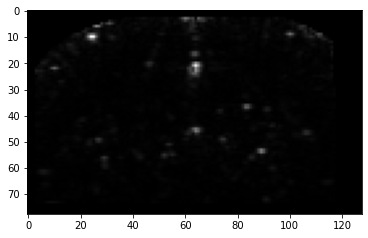

In [4]:
import matplotlib.pyplot as plt

plt.imshow(Im, cmap = 'gray')


In [35]:
from skimage.feature import peak_local_max

yx = peak_local_max(Im, min_distance=1,threshold_abs=250)


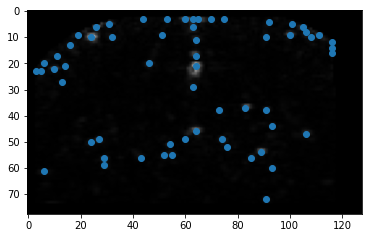

In [36]:
fig, axes = plt.subplots()
axes.imshow(Im, cmap = 'gray')
axes.scatter(yx[:, 1], yx[:, 0])

In [38]:
yx

array([[ 10,  24],
       [ 21,  64],
       [  6,  26],
       [ 46,  64],
       [  3,  60],
       [ 54,  89],
       [  9, 100],
       [ 22,  10],
       [  3,  65],
       [ 37,  83],
       [  5,  31],
       [  9, 111],
       [ 17,  64],
       [  3,  63],
       [ 56,  29],
       [ 49,  27],
       [ 49,  74],
       [ 55,  52],
       [  6, 105],
       [ 10, 108],
       [ 20,  46],
       [ 47, 106],
       [  6,  63],
       [  8, 106],
       [ 51,  54],
       [ 11,  64],
       [ 55,  55],
       [ 10,  32],
       [ 13,  16],
       [  9,  19],
       [  3,  70],
       [ 56,  85],
       [ 23,   3],
       [ 38,  91],
       [ 20,   6],
       [ 38,  73],
       [ 23,   5],
       [ 44,  93],
       [ 59,  29],
       [ 61,   6],
       [ 16, 116],
       [  3,  75],
       [ 17,  11],
       [ 12, 116],
       [ 56,  43],
       [ 72,  91],
       [ 10,  91],
       [  9,  51],
       [ 60,  93],
       [ 29,  63],
       [ 50,  24],
       [ 14, 116],
       [ 52,

In [46]:
import numpy as np
dx = 2
dy = 2
y, x = np.meshgrid(np.arange(yx[5, 1] - dx, yx[5, 1] + dx + 1), np.arange(yx[5, 0] - dy, yx[5, 0] + dy + 1))
print(x)
print(y)
print(yx[1, 1], yx[1, 0])

[[52 52 52 52 52]
 [53 53 53 53 53]
 [54 54 54 54 54]
 [55 55 55 55 55]
 [56 56 56 56 56]]
[[87 88 89 90 91]
 [87 88 89 90 91]
 [87 88 89 90 91]
 [87 88 89 90 91]
 [87 88 89 90 91]]
64 21


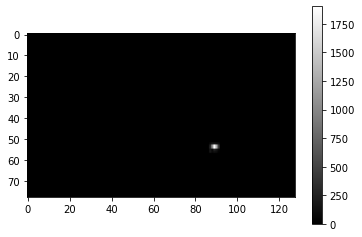

In [47]:
Im_localized = np.zeros(Im.shape)
Im_localized[x, y] = Im[x, y]

fig, axes = plt.subplots()
im = axes.imshow(Im_localized, cmap = 'gray')
fig.colorbar(im)


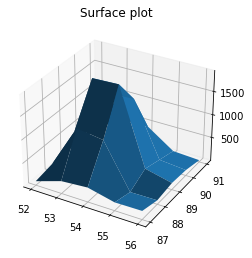

In [48]:

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, Im[x,y])
ax.set_title('Surface plot')

plt.show()



(10000,)

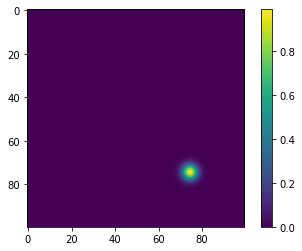

In [82]:
#Lukas code

def gaussion_1d(x, amp, cen, norm):
    """
    Calculate 1d gaussian function for given x

    param: x
    param: amp
    param: cen
    param: norm

    return: function
    """

    return amp * np.exp(-(x - cen) ** 2 / (2 * norm ** 2))


def gaussian_2d(M, amp, cen, norm):
    """
    Calculate 2d gaussian function for given x,y

    param: x - 1d np array
    param: y - 1d np array
    param: amp - 2d list
    param: cen - 2d list
    param: norm - 2d list

    return: scalar function
    """
    x, y = M
    x, y = np.meshgrid(x, y)
    return gaussion_1d(x, amp[0], cen[0], norm[0]) * gaussion_1d(y, amp[1], cen[1], norm[1])


def inspector(matrix):
    """"
    Make simple 2D plot without any extras

    param: matrix - 2d np array
    """
    fig, axes = plt.subplots()
    #im = axes.imshow(matrix, cmap="viridis")
    im = axes.imshow(matrix)
    fig.colorbar(im)
#    fig.show()


def _example():
    m = gaussian_2d(np.vstack([np.linspace(-20, 20, 100),np.linspace(-20, 20, 100)]),
                    np.array([1,1]),
                    np.array([10,10]),
                    np.array([1,1]))

    inspector(m)
    return m.ravel()


if __name__ == '__main__':
   m =  _example()

    
m.shape



In [93]:
from scipy.optimize import curve_fit

def func(x, y, a, b, c):
    return a * np.exp(-b * x) + c


(2, 5)

In [94]:
guess_prms = [yx[1, 1], yx[1, 0], 1, 1, 2000]

In [95]:
from scipy.optimize import curve_fit

# We need to ravel the meshgrids of X, Y points to a pair of 1-D arrays.
xdata = np.vstack((x.ravel(), y.ravel()))
x.ravel()

array([19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22,
       22, 22, 22, 23, 23, 23, 23, 23])

In [96]:
# Do the fit, using our custom _gaussian function which understands our
# flattened (ravelled) ordering of the data points.
popt, pcov = curve_fit(gaussian, xdata, Im[x,y].ravel(), guess_prms)

TypeError: gaussian() missing 1 required positional argument: 'A'

<ipython-input-57-35d273fe4679>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


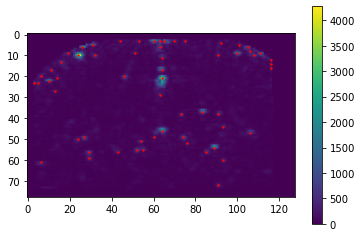

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from twodpeakfinder.code.peakgenerator import gaussian_2d
import scipy.optimize as opt

def plottr(matrix, points, save):
    """
    Calculate 2d gaussian function for given x and y
    Parameter
    ---------
    matrix: float, array
    points: float, array
    save: str
    Returns
    -------
    figure
    """
    fig, axes = plt.subplots()
    im = axes.imshow(matrix, cmap="viridis")
    for i in range(len(points)):
        axes.scatter(points[i,0], points[i,1], s=2, c='red', marker='o')
    fig.colorbar(im)
    fig.show()
    if type(save) == str:
        fig.savefig(save)
    pass


def find_local_maxima(matrix, threshold):
    """ in the 2D array Im find local max
    Parameters
    ----------
    Im : 2D numpy array
    Returns
    -------
    yx : numpy array
        coordinates of local max
    """
    pnt_max = peak_local_max(matrix, min_distance=1, threshold_abs=threshold)

    return pnt_max


def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    if total !=0:
        #print(total)
        X, Y = np.indices(data.shape)
        #print(data.shape)
        x = (X*data).sum()/total
        y = (Y*data).sum()/total
        #print(x,y)
        col = data[:, int(y)]
        width_x = np.sqrt(np.abs((np.arange(col.size)-x)**2*col).sum()/col.sum())
        row = data[int(x), :]
        width_y = np.sqrt(np.abs((np.arange(row.size)-y)**2*row).sum()/row.sum())
        height = data.max()
        return height, x, y, width_x, width_y
    else:
        return 0,0,0,0,0
    
    
def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    if params[0] != 0:
        errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
        p, success = opt.leastsq(errorfunction, params)
        return p
    
    else:
        return 0,0,0,0,0


def peakfitter(data, threshold):
    """"
    Wraps around find_local_maxima and fit gaussion to first finds the peaks and then extract the peak values
    Parameters
    ----------
    data: float, 2d array
    threshold: float
    Returns
    -------
    pnt_max: float, array of guessed maximum position
    results: float, array of fit parameters
    """

    pnt_max = find_local_maxima(data.T, threshold=threshold)
    #print(pnt_max)

    results = np.zeros((len(pnt_max), 5), dtype=object)

    for i in range(len(pnt_max)):
        #print(" i",i)

        cutout = 3
        ymax = pnt_max[i, 0]
        xmax = pnt_max[i, 1]

        a = xmax -cutout
        b = xmax +cutout
        c = ymax -cutout
        d = ymax +cutout

        if xmax-cutout <= 0:
            a = xmax
        elif ymax-cutout <= 0:
            c = xmax
        elif xmax+cutout >= data.shape[0]:
            b = data.shape[0]
        elif ymax+cutout >= data.shape[1]:
            d = data.shape[1]

        data_select = data[a:b,c:d]

        params = fitgaussian(data_select)
        results[i] = params
        results[i, 1:3] += np.array([a,c])

    return pnt_max, results


def _example():
    d = 0
    for i in range(20):
        d = d + gaussian_2d(np.linspace(0, 100, 1000),
                            np.linspace(0, 100, 1000),
                            np.random.random(2),
                            np.random.randint(low=0, high=100, size=(1,2))[0],
                            np.random.randint(low=1, high=20, size=(1,2))[0]/10
                            )

    pnts, results = peakfitter(Im, threshold=250)
    plottr(Im, points=pnts, save="twodpeakfinder/images/2021-01-26_multiple-peak-plot.png")
    #print(results, pnts)
    #print(len(pnts))



if __name__ == '__main__':
    _example()

9984

9984